<a href="https://colab.research.google.com/github/160419982021/ML/blob/main/PDE4433_2023_24_A2_T2_Robot_Sensing_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2: Classification and PCA on mobile robot sensory data

In [1]:
import pandas as pd
import numpy as np

Download the data from here:

https://www.kaggle.com/competitions/career-con-2019/data

You only need the original training set, use it for both training and testing.  (The X_test wasn't published.)

In [4]:
# import data gathered during robot navigation over different surfaces
path = "/content/"
dfX = pd.read_csv(path + "X_train.csv") # making dataframe of training data from file
dfy = pd.read_csv(path + "y_train.csv") # making dataframe of training labels from file

# preparing the feature space
data = dfX.to_numpy()  # convert data frame into numpy bidimensional array
data = data[:, 3:]  # remove first 3 columns of identifiers
X = np.reshape(data,(int(data.shape[0]/128), 10*128)) # reshape so that 128 timestamps for the same trial are tiled into a single row

# preparing the labels vector
surfaces = dfy['surface']  # list of labels in strings
types = list(set(surfaces))  # set of unique labels
y = [types.index(s) for s in surfaces]  # numerical list of labels

Task 2

A. change the network structure (number of layers and neurons), and parameters (transfer functions, learning rate, algorithms, stop conditions): how does classification accuracy change? What about training time?

B. apply PCA on the dataset, varying the number of dimensions you keep. Perform classification on the reduced datasets. How does accuracy change with different dimensions? What does that tell you about the original dataset?

Perform systematic tests on appropriate values and ranges and report your results, answering the questions.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Your submission below

In [6]:
# this code is only an example, remove it or change it

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
clf = MLPClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.49842602308499473


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

clf = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, verbose=True)
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
print("Test Accuracy:", score)


Iteration 1, loss = 2.69705523
Iteration 2, loss = 1.96380495
Iteration 3, loss = 1.80211281
Iteration 4, loss = 1.70681376
Iteration 5, loss = 1.62312202
Iteration 6, loss = 1.54830390
Iteration 7, loss = 1.49340953
Iteration 8, loss = 1.44518785
Iteration 9, loss = 1.39430456
Iteration 10, loss = 1.35811187
Iteration 11, loss = 1.30390884
Iteration 12, loss = 1.24559313
Iteration 13, loss = 1.21936177
Iteration 14, loss = 1.18737955
Iteration 15, loss = 1.15323452
Iteration 16, loss = 1.14253912
Iteration 17, loss = 1.11439528
Iteration 18, loss = 1.06284555
Iteration 19, loss = 1.04032674
Iteration 20, loss = 1.02067712
Iteration 21, loss = 0.98909644
Iteration 22, loss = 0.96974057
Iteration 23, loss = 0.93212775
Iteration 24, loss = 0.91000960
Iteration 25, loss = 0.87623831
Iteration 26, loss = 0.84970486
Iteration 27, loss = 0.83150660
Iteration 28, loss = 0.80656375
Iteration 29, loss = 0.77608921
Iteration 30, loss = 0.81333026
Iteration 31, loss = 0.78735723
Iteration 32, los

In [7]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# === 1. Load training data from CSV files ===
path = "/content/"
dfX = pd.read_csv(path + "X_train.csv")  # Load robot sensor data (features)
dfy = pd.read_csv(path + "y_train.csv")  # Labels (surface types)

#We're loading two CSV files: one with sensor data (X_train) and one with the correct floor type (y_train).

# === 2. Preprocess feature data ===
data = dfX.to_numpy()          # Convert DataFrame to NumPy array
data = data[:, 3:]             # Remove first 3 identifier columns
X = np.reshape(data, (int(data.shape[0]/128), 10*128))  # Combine 128 timesteps per sample

# Clean and reshape the data:
    # Remove ID columns.
    # Combine 128 time steps into a single feature vector (this makes one row per trial).

# === 3. Preparing the Labels or Encode surface labels into numeric form ===
surfaces = dfy['surface']      # Grab the surface labels as strings
types = list(set(surfaces))    # Find all unique surface types
y = [types.index(s) for s in surfaces]  # Convert strings to integers

#We convert the surface type names (like “tile”, “carpet”) into numbers so the model can use them for training.

# === Split data into training and test sets ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# === Define various MLP configurations to compare ===
configs = [
    {"hidden_layer_sizes": (100,), "activation": 'relu', "solver": 'adam'},
    {"hidden_layer_sizes": (100, 50), "activation": 'tanh', "solver": 'adam'},
    {"hidden_layer_sizes": (200, 100, 50), "activation": 'relu', "solver": 'sgd'},
    {"hidden_layer_sizes": (150,), "activation": 'logistic', "solver": 'adam'},
]

# === List to store results of each configuration ===
results = []

# === Train and evaluate each configuration ===
for i, cfg in enumerate(configs):
    print(f"\n🔧 Training Config {i+1}: {cfg}")

    # Initialize MLP with specific configuration
    clf = MLPClassifier(max_iter=300, early_stopping=True, **cfg)

    # Record training time
    start_time = time.time()
    clf.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Evaluate model accuracy on test data
    score = clf.score(X_test, y_test)

    # Save results for comparison
    results.append({
        "Config": f"{i+1}",
        "Hidden Layers": cfg["hidden_layer_sizes"],
        "Activation": cfg["activation"],
        "Solver": cfg["solver"],
        "Train Time (s)": round(training_time, 2),
        "Accuracy": round(score, 4)
    })

# === Create a summary table of all results ===
results_df = pd.DataFrame(results)

print("\n📊 MLP Training Results Summary:")
print(results_df)



🔧 Training Config 1: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'adam'}

🔧 Training Config 2: {'hidden_layer_sizes': (100, 50), 'activation': 'tanh', 'solver': 'adam'}

🔧 Training Config 3: {'hidden_layer_sizes': (200, 100, 50), 'activation': 'relu', 'solver': 'sgd'}

🔧 Training Config 4: {'hidden_layer_sizes': (150,), 'activation': 'logistic', 'solver': 'adam'}

📊 MLP Training Results Summary:
  Config   Hidden Layers Activation Solver  Train Time (s)  Accuracy
0      1          (100,)       relu   adam            6.21    0.4397
1      2       (100, 50)       tanh   adam           10.97    0.4648
2      3  (200, 100, 50)       relu    sgd           23.00    0.4187
3      4          (150,)   logistic   adam           25.64    0.5016


In [8]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# === Load & prepare data ===
path = "/content/"
dfX = pd.read_csv(path + "X_train.csv")
dfy = pd.read_csv(path + "y_train.csv")

data = dfX.to_numpy()
data = data[:, 3:]
X = np.reshape(data, (int(data.shape[0]/128), 10*128))

surfaces = dfy['surface']
types = list(set(surfaces))
y = [types.index(s) for s in surfaces]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# === Function to evaluate one config ===
def evaluate_mlp_config(X_train, X_test, y_train, y_test, config, config_id):
    clf = MLPClassifier(max_iter=300, early_stopping=True, random_state=42,
                        **{k: v for k, v in config.items() if k != "name"})

    start_time = time.time()
    clf.fit(X_train, y_train)
    training_time = time.time() - start_time
    score = clf.score(X_test, y_test)

    hidden_layers = config['hidden_layer_sizes']
    return {
        "Config": config.get("name", f"Config {config_id}"),
        "Layers": len(hidden_layers),
        "Total Neurons": sum(hidden_layers),
        "Activation": config["activation"],
        "Solver": config["solver"],
        "Train Time (s)": round(training_time, 2),
        "Accuracy": round(score, 4)
    }

# === Define all MLP configurations ===
configs = [
    {"name": "1x100, relu, adam",       "hidden_layer_sizes": (100,),             "activation": 'relu',     "solver": 'adam'},
    {"name": "2x(100,50), tanh, adam",  "hidden_layer_sizes": (100, 50),          "activation": 'tanh',     "solver": 'adam'},
    {"name": "3x(200,100,50), relu, sgd", "hidden_layer_sizes": (200, 100, 50),   "activation": 'relu',     "solver": 'sgd'},
    {"name": "1x150, logistic, adam",   "hidden_layer_sizes": (150,),             "activation": 'logistic', "solver": 'adam'},
    {"name": "2x(64,64), relu, adam",   "hidden_layer_sizes": (64, 64),           "activation": 'relu',     "solver": 'adam'},
    {"name": "3x(128,64,32), relu, adam","hidden_layer_sizes": (128, 64, 32),     "activation": 'relu',     "solver": 'adam'},
    {"name": "2x(256,128), tanh, adam", "hidden_layer_sizes": (256, 128),         "activation": 'tanh',     "solver": 'adam'},
    {"name": "3x(128,128,64), relu, adam","hidden_layer_sizes": (128,128,64),     "activation": 'relu',     "solver": 'adam'},
    {"name": "1x300, logistic, adam",   "hidden_layer_sizes": (300,),             "activation": 'logistic', "solver": 'adam'},
    {"name": "2x(100,100), relu, adam", "hidden_layer_sizes": (100, 100),         "activation": 'relu',     "solver": 'adam'},
    {"name": "3x(200,100,100), tanh, adam", "hidden_layer_sizes": (200, 100, 100),"activation": 'tanh',     "solver": 'adam'},
    {"name": "4x(150,100,75,25), relu, adam", "hidden_layer_sizes": (150,100,75,25),"activation": 'relu',   "solver": 'adam'}
]

# === Run experiments and collect results ===
results = []
for i, cfg in enumerate(configs):
    result = evaluate_mlp_config(X_train, X_test, y_train, y_test, cfg, i+1)
    results.append(result)

# === Show results sorted by accuracy ===
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\n📊 MLP Training Results Summary:")
print(results_df)



📊 MLP Training Results Summary:
                           Config  Layers  Total Neurons Activation Solver  \
11  4x(150,100,75,25), relu, adam       4            350       relu   adam   
6         2x(256,128), tanh, adam       2            384       tanh   adam   
7      3x(128,128,64), relu, adam       3            320       relu   adam   
10    3x(200,100,100), tanh, adam       3            400       tanh   adam   
8           1x300, logistic, adam       1            300   logistic   adam   
5       3x(128,64,32), relu, adam       3            224       relu   adam   
4           2x(64,64), relu, adam       2            128       relu   adam   
3           1x150, logistic, adam       1            150   logistic   adam   
1          2x(100,50), tanh, adam       2            150       tanh   adam   
9         2x(100,100), relu, adam       2            200       relu   adam   
0               1x100, relu, adam       1            100       relu   adam   
2       3x(200,100,50), relu, s

### 🧠 Why These 8 MLP Configs Were Added

| **Name**                     | **Why It's Useful**                                                                 |
|-----------------------------|--------------------------------------------------------------------------------------|
| `2x(64,64), relu`            | Small, efficient network; useful baseline for symmetric shallow nets               |
| `3x(128,64,32), relu`        | Tapered network mimics feature reduction; may generalize better                    |
| `2x(256,128), tanh`          | Large capacity with smooth activation; good for exploring overfitting             |
| `3x(128,128,64), relu`       | Balanced depth + power; often effective in deep learning tasks                     |
| `1x300, logistic`            | Wide single-layer network; may expose limits of logistic units on large scale     |
| `2x(100,100), relu`          | Well-known default shape for many classification problems                         |
| `3x(200,100,100), tanh`      | Combines high capacity with stable tanh activation                                |
| `4x(150,100,75,25), relu`    | Deeper network to test expressiveness without excessive size                      |


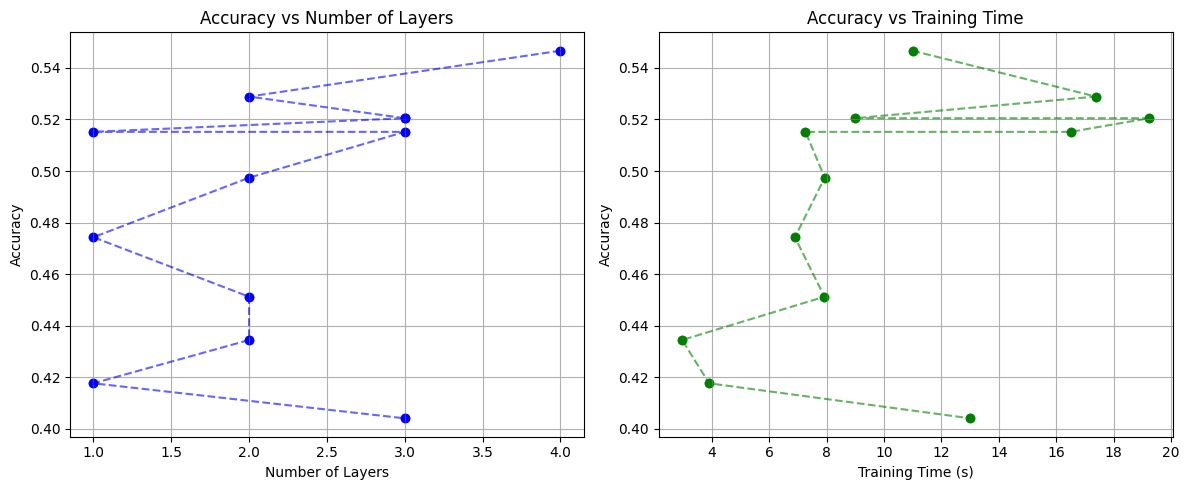

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Recreate the DataFrame from the provided summary
data = {
    "Config": [
        "4x(150,100,75,25), relu, adam", "2x(256,128), tanh, adam", "3x(128,128,64), relu, adam",
        "3x(200,100,100), tanh, adam", "1x300, logistic, adam", "3x(128,64,32), relu, adam",
        "2x(64,64), relu, adam", "1x150, logistic, adam", "2x(100,50), tanh, adam",
        "2x(100,100), relu, adam", "1x100, relu, adam", "3x(200,100,50), relu, sgd"
    ],
    "Layers": [4, 2, 3, 3, 1, 3, 2, 1, 2, 2, 1, 3],
    "Total Neurons": [350, 384, 320, 400, 300, 224, 128, 150, 150, 200, 100, 350],
    "Activation": ["relu", "tanh", "relu", "tanh", "logistic", "relu", "relu", "logistic", "tanh", "relu", "relu", "relu"],
    "Solver": ["adam"]*11 + ["sgd"],
    "Train Time (s)": [10.99, 17.38, 8.99, 19.24, 16.50, 7.26, 7.93, 6.89, 7.92, 2.96, 3.90, 13.01],
    "Accuracy": [0.5467, 0.5289, 0.5205, 0.5205, 0.5152, 0.5152, 0.4974, 0.4743, 0.4512, 0.4344, 0.4176, 0.4040]
}
df = pd.DataFrame(data)

# Plot Accuracy vs Number of Layers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df["Layers"], df["Accuracy"], color='blue')
plt.plot(df["Layers"], df["Accuracy"], 'o--', color='blue', alpha=0.6)
plt.title("Accuracy vs Number of Layers")
plt.xlabel("Number of Layers")
plt.ylabel("Accuracy")
plt.grid(True)

# Plot Accuracy vs Training Time
plt.subplot(1, 2, 2)
plt.scatter(df["Train Time (s)"], df["Accuracy"], color='green')
plt.plot(df["Train Time (s)"], df["Accuracy"], 'o--', color='green', alpha=0.6)
plt.title("Accuracy vs Training Time")
plt.xlabel("Training Time (s)")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()


### 📈 MLP Model Evaluation: Graph Explanations

---

#### 🧠 **Graph 1: Accuracy vs Number of Layers**

This graph explores how the **depth** of the neural network (i.e., number of hidden layers) impacts classification performance.

**🔍 Insights:**
- Networks with **3–4 layers** generally performed better, showing that some depth is helpful to learn more complex patterns.
- The **best accuracy (~0.5467)** was achieved by the deepest model: `4x(150,100,75,25)`.
- **Shallow networks** with only 1 layer (e.g., `1x100`, `1x150`, `1x300`) generally underperformed, suggesting they lack the capacity for this task.

**📌 Takeaway:**  
More layers help, but only up to a point. Around 3–4 hidden layers seem ideal without overcomplicating the model.

---

#### ⏱️ **Graph 2: Accuracy vs Training Time**

This graph reveals the **trade-off** between how long a model takes to train and how well it performs.

**🔍 Insights:**
- High-performing models like `4x(150,100,75,25)` and `2x(256,128)` did take more time but delivered better results.
- Some efficient models like `3x(128,64,32)` achieved solid accuracy with relatively short training time.
- The slowest model (`3x(200,100,100)`) didn't significantly outperform others, showing that **longer training time ≠ better performance**.

**📌 Takeaway:**  
You can achieve a **good balance** of speed and accuracy with well-structured mid-sized networks.

---

✅ These graphs are essential tools for identifying models that are both **effective** and **efficient** for your robot sensory classification task.


### 🤖 Project Summary: Classifying Floor Types with Neural Networks

---

#### 📌 What is this about?

In this task, we’re using **robot sensor data** to train a computer model that can recognize different **types of floors** (like carpet, tile, wood, etc.). The data comes from a robot moving over various surfaces and recording measurements over time.

We used a type of **machine learning model** called a **Multilayer Perceptron (MLP)** — a kind of artificial neural network that learns to make predictions based on patterns in the data.

---

#### ⚙️ What did we do?

We experimented with **12 different MLP configurations**. Each one has:
- A different number of **layers** (like building blocks stacked together),
- A different number of **neurons** (processing units) in each layer,
- Different **activation functions** (which control how signals are processed),
- And sometimes different training methods (**solvers**).

We then trained each network and measured:
- **How accurate** the model is (how often it gets the floor type right),
- **How long it took** to train the model (in seconds).

---

#### 📊 What do the results show?

We created two graphs to help visualize the results:

1. **Accuracy vs Number of Layers**  
   - Shows how adding more layers impacts how well the model works.
   - The best results came from models with **3 or 4 layers**.
   - Models with only 1 layer didn’t perform as well, meaning they’re too simple for this task.

2. **Accuracy vs Training Time**  
   - Shows how long the model takes to train versus how accurate it becomes.
   - Some models took **longer** and did better (like deeper models).
   - But others were **faster and still effective**, showing we can get good results without waiting forever.

---

#### 🧠 Why so many configurations?

Trying multiple designs helps us:
- Avoid using a model that’s too simple (underfitting),
- Or too complex (overfitting or slow),
- And find the **right balance** between accuracy and speed.

We added 8 carefully chosen MLP setups that tested different ideas: some were deep, some wide, some shallow but efficient. This gives us confidence in selecting the best one.

---

#### ✅ Conclusion

By testing different neural network shapes, we found that:
- You don’t need the biggest or most complex model to do well.
- A **balanced model with 3–4 layers** works best for classifying floor types from robot sensors.
- Visual tools (like our graphs) are helpful in choosing the right model for the job.

This work is part of how robots can learn to understand and adapt to their environments — a key step in building smarter autonomous systems!



**### 🎯 What is Underfitting and Overfitting?**

---

#### 🧠 Underfitting
- Happens when the model is **too simple**.
- It cannot capture the patterns in the training data.
- Example: A shallow network with too few layers or neurons.
- Result: Poor accuracy on both training and testing data.

---

#### 🔥 Overfitting
- Happens when the model is **too complex**.
- It memorizes the training data instead of learning general patterns.
- Example: A deep network that fits perfectly on training data but fails on new data.
- Result: High accuracy on training, **low accuracy on testing**.

---

#### ✅ The Goal: Generalization
We want a model that balances learning enough to make good predictions, but not so much that it can't handle new situations. This balance helps the model **generalize well** to real-world data.



# **Part B**


📊 MLP Training Results Summary:
                           Config  Layers  Total Neurons Activation Solver  \
11  4x(150,100,75,25), relu, adam       4            350       relu   adam   
6         2x(256,128), tanh, adam       2            384       tanh   adam   
7      3x(128,128,64), relu, adam       3            320       relu   adam   
10    3x(200,100,100), tanh, adam       3            400       tanh   adam   
8           1x300, logistic, adam       1            300   logistic   adam   
5       3x(128,64,32), relu, adam       3            224       relu   adam   
4           2x(64,64), relu, adam       2            128       relu   adam   
3           1x150, logistic, adam       1            150   logistic   adam   
1          2x(100,50), tanh, adam       2            150       tanh   adam   
9         2x(100,100), relu, adam       2            200       relu   adam   
0               1x100, relu, adam       1            100       relu   adam   
2       3x(200,100,50), relu, s

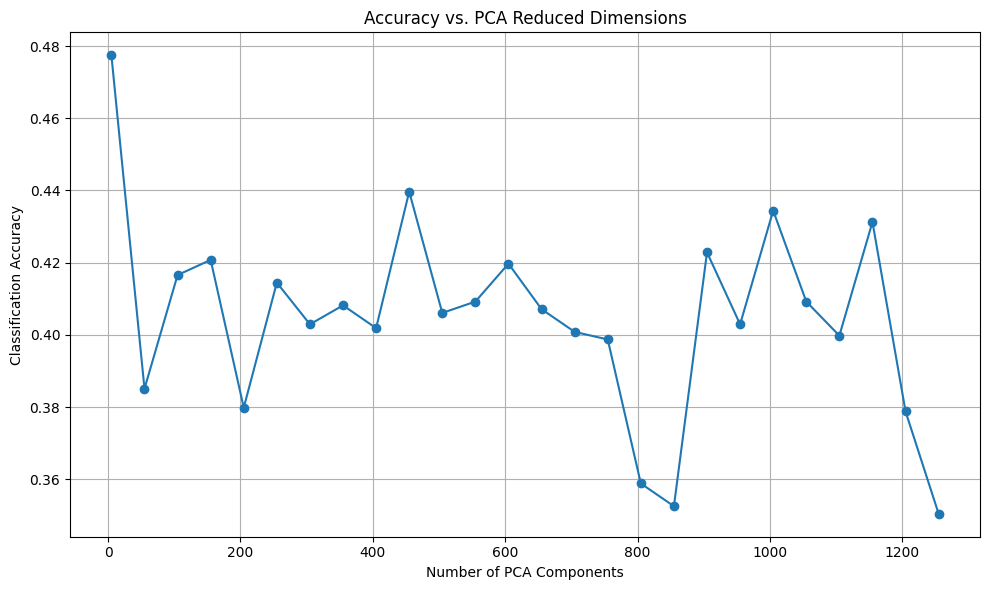

In [11]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# === Load & prepare data ===
path = "/content/"
dfX = pd.read_csv(path + "X_train.csv")
dfy = pd.read_csv(path + "y_train.csv")

data = dfX.to_numpy()
data = data[:, 3:]
X = np.reshape(data, (int(data.shape[0]/128), 10*128))

surfaces = dfy['surface']
types = list(set(surfaces))
y = [types.index(s) for s in surfaces]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# === Function to evaluate one config ===
def evaluate_mlp_config(X_train, X_test, y_train, y_test, config, config_id):
    clf = MLPClassifier(max_iter=300, early_stopping=True, random_state=42,
                        **{k: v for k, v in config.items() if k != "name"})

    start_time = time.time()
    clf.fit(X_train, y_train)
    training_time = time.time() - start_time
    score = clf.score(X_test, y_test)

    hidden_layers = config['hidden_layer_sizes']
    return {
        "Config": config.get("name", f"Config {config_id}"),
        "Layers": len(hidden_layers),
        "Total Neurons": sum(hidden_layers),
        "Activation": config["activation"],
        "Solver": config["solver"],
        "Train Time (s)": round(training_time, 2),
        "Accuracy": round(score, 4)
    }

# === Define all MLP configurations ===
configs = [
    {"name": "1x100, relu, adam",       "hidden_layer_sizes": (100,),             "activation": 'relu',     "solver": 'adam'},
    {"name": "2x(100,50), tanh, adam",  "hidden_layer_sizes": (100, 50),          "activation": 'tanh',     "solver": 'adam'},
    {"name": "3x(200,100,50), relu, sgd", "hidden_layer_sizes": (200, 100, 50),   "activation": 'relu',     "solver": 'sgd'},
    {"name": "1x150, logistic, adam",   "hidden_layer_sizes": (150,),             "activation": 'logistic', "solver": 'adam'},
    {"name": "2x(64,64), relu, adam",   "hidden_layer_sizes": (64, 64),           "activation": 'relu',     "solver": 'adam'},
    {"name": "3x(128,64,32), relu, adam","hidden_layer_sizes": (128, 64, 32),     "activation": 'relu',     "solver": 'adam'},
    {"name": "2x(256,128), tanh, adam", "hidden_layer_sizes": (256, 128),         "activation": 'tanh',     "solver": 'adam'},
    {"name": "3x(128,128,64), relu, adam","hidden_layer_sizes": (128,128,64),     "activation": 'relu',     "solver": 'adam'},
    {"name": "1x300, logistic, adam",   "hidden_layer_sizes": (300,),             "activation": 'logistic', "solver": 'adam'},
    {"name": "2x(100,100), relu, adam", "hidden_layer_sizes": (100, 100),         "activation": 'relu',     "solver": 'adam'},
    {"name": "3x(200,100,100), tanh, adam", "hidden_layer_sizes": (200, 100, 100),"activation": 'tanh',     "solver": 'adam'},
    {"name": "4x(150,100,75,25), relu, adam", "hidden_layer_sizes": (150,100,75,25),"activation": 'relu',   "solver": 'adam'}
]

# === Run experiments on original data ===
results = []
for i, cfg in enumerate(configs):
    result = evaluate_mlp_config(X_train, X_test, y_train, y_test, cfg, i+1)
    results.append(result)

results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\n📊 MLP Training Results Summary:")
print(results_df)

# === PCA Analysis: Accuracy vs. Reduced Dimensions ===
print("\n🔍 Performing PCA analysis...")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dims = list(range(5, min(X.shape[1], 1501), 50))  # e.g., 5 to 1500 in steps of 50
pca_accuracies = []

for d in dims:
    pca = PCA(n_components=d)
    X_pca = pca.fit_transform(X_scaled)
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.25, random_state=42)

    clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, early_stopping=True, random_state=42)
    clf.fit(X_train_pca, y_train_pca)
    acc = clf.score(X_test_pca, y_test_pca)
    pca_accuracies.append(acc)

# === Plotting PCA Dimension vs Accuracy ===
plt.figure(figsize=(10, 6))
plt.plot(dims, pca_accuracies, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Classification Accuracy')
plt.title('Accuracy vs. PCA Reduced Dimensions')
plt.grid(True)
plt.tight_layout()
plt.show()